#**Orinson Technologies**

##Task -2

15,000 Music Tracks - 19 Genres (w/ Spotify Data)
Kaggle Link - https://www.kaggle.com/datasets/thebumpkin/10400-classic-hits-10-genres-1923-to-2023/data


Submitted by: Akshat Thakur


#1. Loading and Exploring the Dataset

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset from the correct path
file_path = '/content/ClassicHit.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

# Get basic info of the dataset
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15150 non-null  object 
 1   Artist            15150 non-null  object 
 2   Year              15150 non-null  int64  
 3   Duration          15150 non-null  int64  
 4   Time_Signature    15150 non-null  int64  
 5   Danceability      15150 non-null  float64
 6   Energy            15150 non-null  float64
 7   Key               15150 non-null  int64  
 8   Loudness          15150 non-null  float64
 9   Mode              15150 non-null  int64  
 10  Speechiness       15150 non-null  float64
 11  Acousticness      15150 non-null  float64
 12  Instrumentalness  15150 non-null  float64
 13  Liveness          15150 non-null  float64
 14  Valence           15150 non-null  float64
 15  Tempo             15150 non-null  float64
 16  Popularity        15150 non-null  int64 

,0
Track,0
Artist,0
Year,0
Duration,0
Time_Signature,0
Danceability,0
Energy,0
Key,0
Loudness,0
Mode,0


#2. Preprocessing the Data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = '/content/ClassicHit.csv'
df = pd.read_csv(file_path)

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Handle missing values for numeric columns
imputer = SimpleImputer(strategy='mean')
df_numeric_filled = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Standardize only the numeric columns
scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric_filled), columns=numeric_cols)

# Combine scaled numeric columns with the original non-numeric columns
df_final = pd.concat([df_numeric_scaled, df[non_numeric_cols].reset_index(drop=True)], axis=1)

# Display the cleaned and scaled data
df_final.head()


,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Track,Artist,Genre
0,0.117557,-0.329793,0.224943,0.248692,-0.445439,0.207972,-1.571182,0.659905,-0.616341,-0.831545,-0.397466,-0.285760,0.130913,0.388995,-0.145560,Hey Jack Kerouac,"10,000 Maniacs",Alt. Rock
1,0.117557,-0.043952,0.224943,1.175270,-0.662541,-1.192747,-1.934635,0.659905,-0.440026,-0.599940,-0.382492,-0.314300,1.561414,0.434779,-0.001242,Like the Weather,"10,000 Maniacs",Alt. Rock
2,0.117557,0.471393,0.224943,0.110307,0.827945,1.048403,0.433986,0.659905,-0.447747,-0.938253,-0.397327,-0.630528,-0.207785,-0.708909,-1.492533,What's the Matter Here?,"10,000 Maniacs",Alt. Rock
3,0.220217,-0.451285,0.224943,1.722793,-0.971493,-0.912603,-0.210391,0.659905,-0.536549,-0.467774,-0.397466,-0.439878,-0.307402,-0.094279,0.191183,Trouble Me,"10,000 Maniacs",Alt. Rock
4,0.374207,-0.523123,0.224943,0.284792,1.078446,1.328547,0.663154,0.659905,-0.582880,-0.891649,-0.367605,-0.578584,1.178885,-0.537834,-0.001242,Candy Everybody Wants,"10,000 Maniacs",Alt. Rock


#Machine Learning Models

##1. Linear Regression:
### Linear Regression is one of the simplest and most widely used algorithms for predictive modeling. It is used to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation. It's primarily used for regression tasks (predicting a continuous value).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = '/content/ClassicHit.csv'
df = pd.read_csv(file_path)

# Inspect columns to find the correct target column
print(df.columns)  # Check the actual target column name

# Separate target column before scaling
target_column = 'Popularity'  # Use the correct column name with uppercase 'P'

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_numeric = df.select_dtypes(include=['float64', 'int64']).drop(target_column, axis=1)
df_filled = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Standardize the dataset (normalize features only, exclude target)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_filled), columns=df_filled.columns)

# Add target column back to df_scaled (for reference)
df_scaled[target_column] = df[target_column]

# Split the dataset into features (X) and target (y)
X = df_scaled.drop(target_column, axis=1)
y = df_scaled[target_column]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Linear Regression):", mse)


Index(['Track', 'Artist', 'Year', 'Duration', 'Time_Signature', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Popularity',
       'Genre'],
      dtype='object')
Mean Squared Error (Linear Regression): 367.0811010813538


##2. Decision Tree
###A Decision Tree is a flowchart-like structure used for both classification and regression tasks. Each internal node represents a "test" on a feature, each branch represents the outcome of the test, and each leaf node represents a class label or predicted value. It's a non-linear model, making it powerful for datasets with complex interactions between features.


Mean Squared Error (Decision Tree): 652.0518151815181


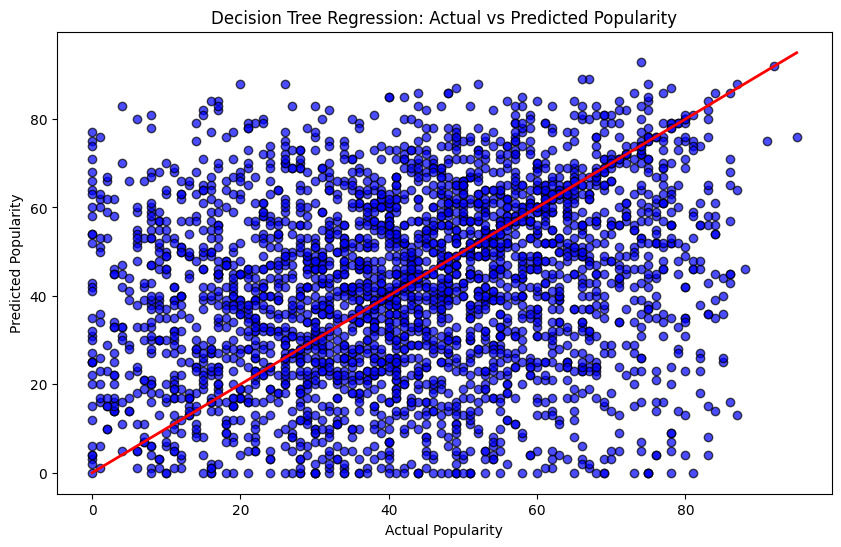

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Mean Squared Error (Decision Tree):", mse_tree)

# Visualization: Compare actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line showing perfect prediction
plt.title('Decision Tree Regression: Actual vs Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.show()


##3. Random Forest:
###Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the average of the predictions for regression tasks. It generally performs better than individual decision trees due to the reduction of overfitting by averaging the trees' predictions.

Mean Squared Error (Random Forest): 320.91558196784933


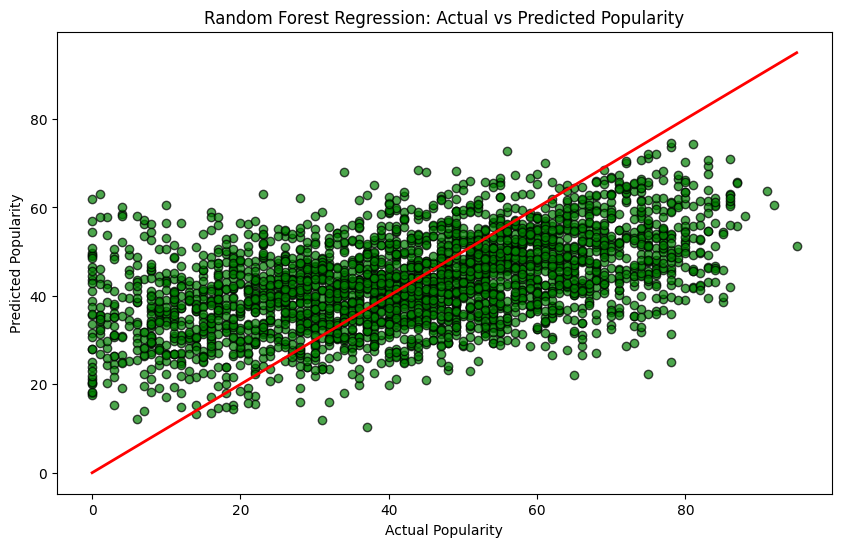

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
print("Mean Squared Error (Random Forest):", mse_forest)

# Visualization: Compare actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_forest, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line showing perfect prediction
plt.title('Random Forest Regression: Actual vs Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.show()


#1. How has the average popularity of songs changed over the decades?

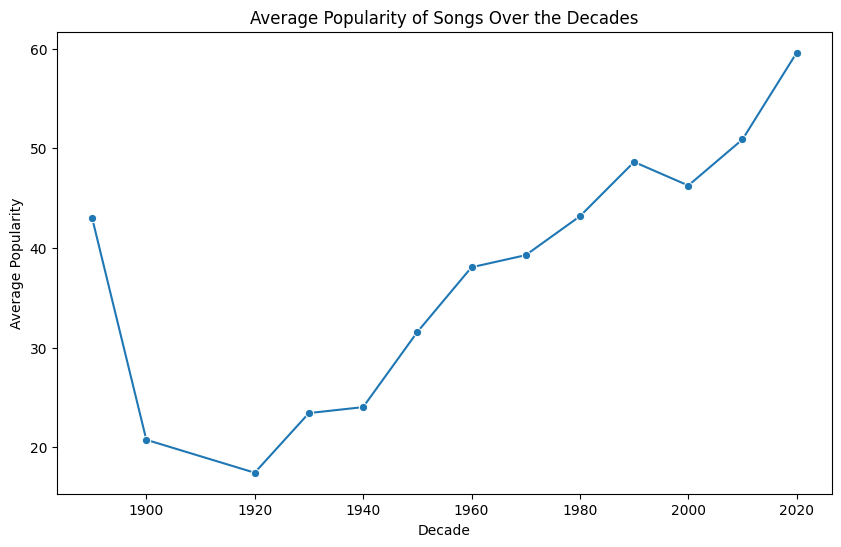

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for the decade
df['Decade'] = (df['Year'] // 10) * 10

# Group by decade and calculate the mean popularity
decade_popularity = df.groupby('Decade')['Popularity'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Decade', y='Popularity', data=decade_popularity, marker='o')
plt.title('Average Popularity of Songs Over the Decades')
plt.xlabel('Decade')
plt.ylabel('Average Popularity')
plt.show()


#2. Which genres have the highest average popularity?

<ipython-input-7-ba3dda74a09d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Popularity', y='Genre', data=genre_popularity, palette='viridis')


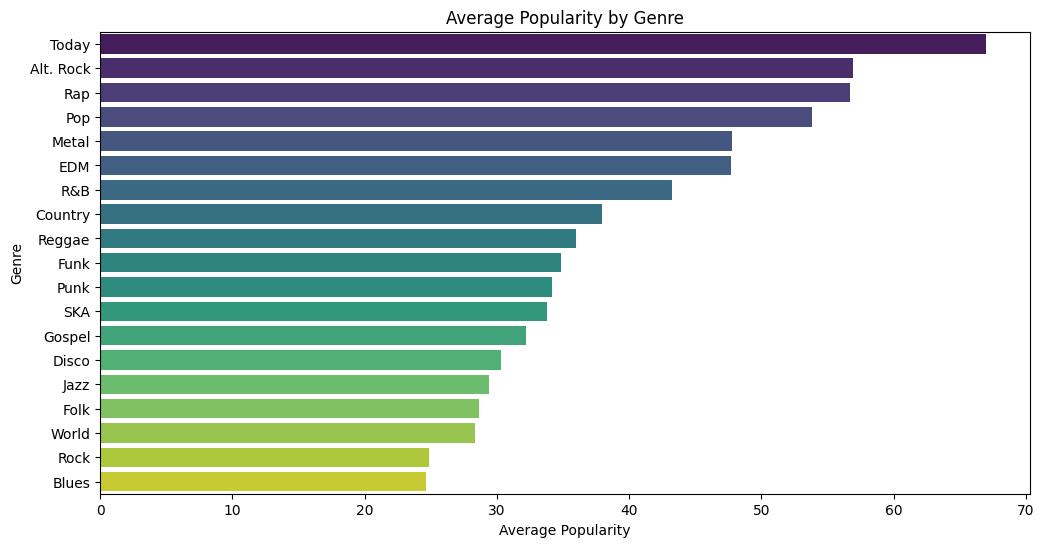

In [ ]:
# Group by genre and calculate the mean popularity
genre_popularity = df.groupby('Genre')['Popularity'].mean().reset_index()

# Sort genres by popularity
genre_popularity = genre_popularity.sort_values('Popularity', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Popularity', y='Genre', data=genre_popularity, palette='viridis')
plt.title('Average Popularity by Genre')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()


#3. Is there a relationship between the duration of a song and its popularity?

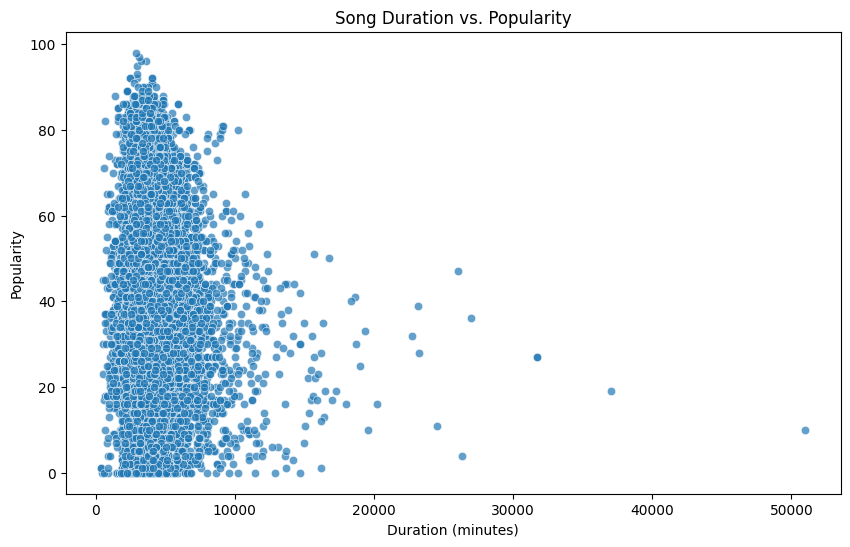

In [13]:
# Convert duration from seconds to minutes
df['Duration_Minutes'] = df['Duration'] / 60

# Scatter plot for duration in minutes vs. popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_Minutes', y='Popularity', data=df, alpha=0.7)
plt.title('Song Duration vs. Popularity')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.show()


#4. How do key and mode combinations affect song popularity?

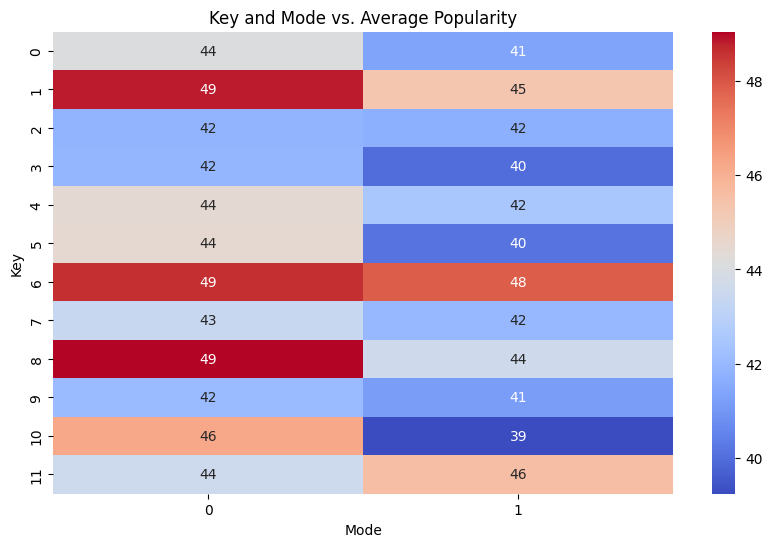

In [14]:
# Create a pivot table for key and mode
key_mode_popularity = df.pivot_table(values='Popularity', index='Key', columns='Mode', aggfunc='mean')

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(key_mode_popularity, cmap='coolwarm', annot=True)
plt.title('Key and Mode vs. Average Popularity')
plt.xlabel('Mode')
plt.ylabel('Key')
plt.show()


#5. Which artists have produced the most popular songs?

<ipython-input-15-7aea33fc8927>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Popularity', y='Artist', data=top_artists, palette='plasma')


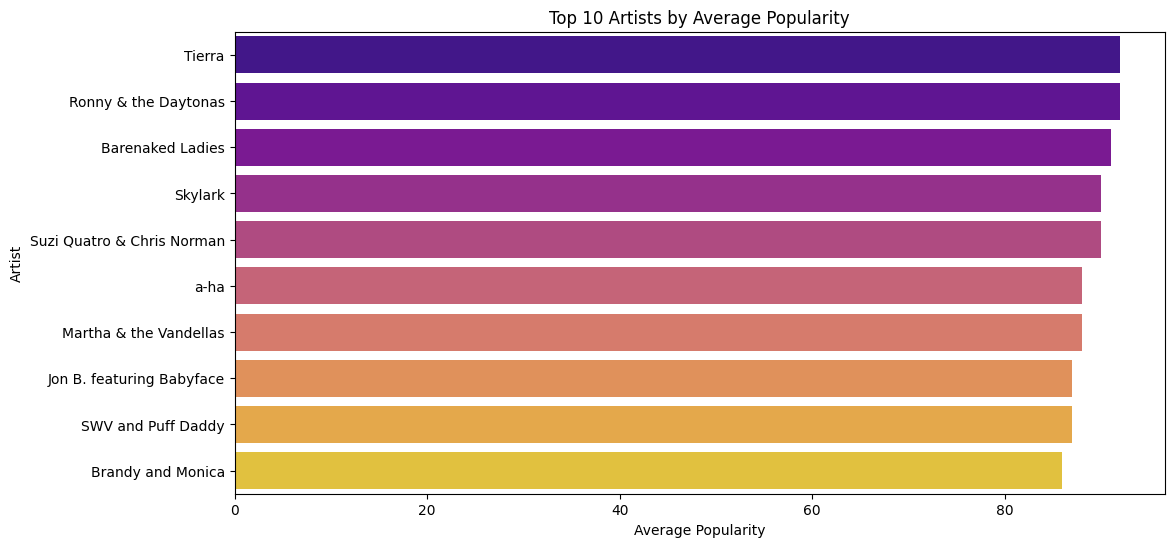

In [15]:
# Group by artist and calculate the mean popularity
artist_popularity = df.groupby('Artist')['Popularity'].mean().reset_index()

# Sort by popularity and select top 10
top_artists = artist_popularity.sort_values('Popularity', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Popularity', y='Artist', data=top_artists, palette='plasma')
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.show()


#6. How does loudness correlate with the energy of a song?

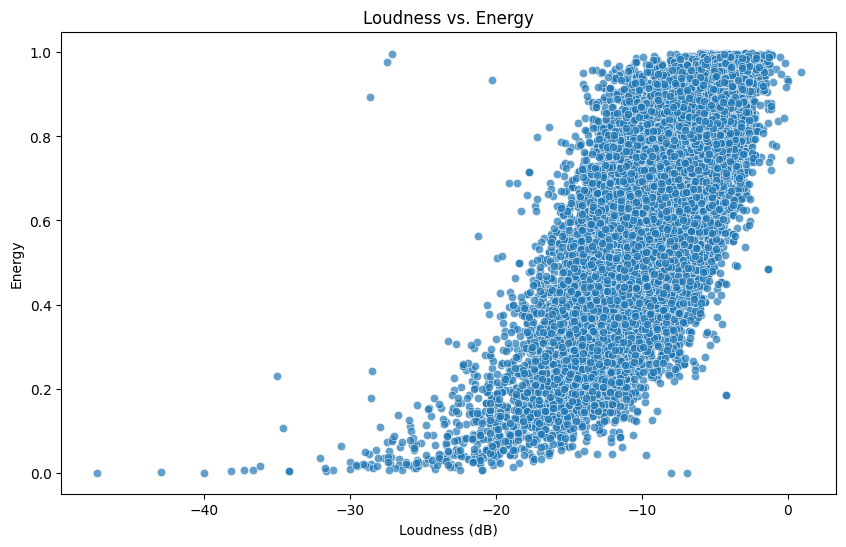

In [16]:
# Scatter plot for loudness vs. energy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Loudness', y='Energy', data=df, alpha=0.7)
plt.title('Loudness vs. Energy')
plt.xlabel('Loudness (dB)')
plt.ylabel('Energy')
plt.show()


#7. Do certain time signatures tend to produce more popular songs?

<ipython-input-17-be737a594bdb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time_Signature', y='Popularity', data=time_signature_popularity, palette='magma')


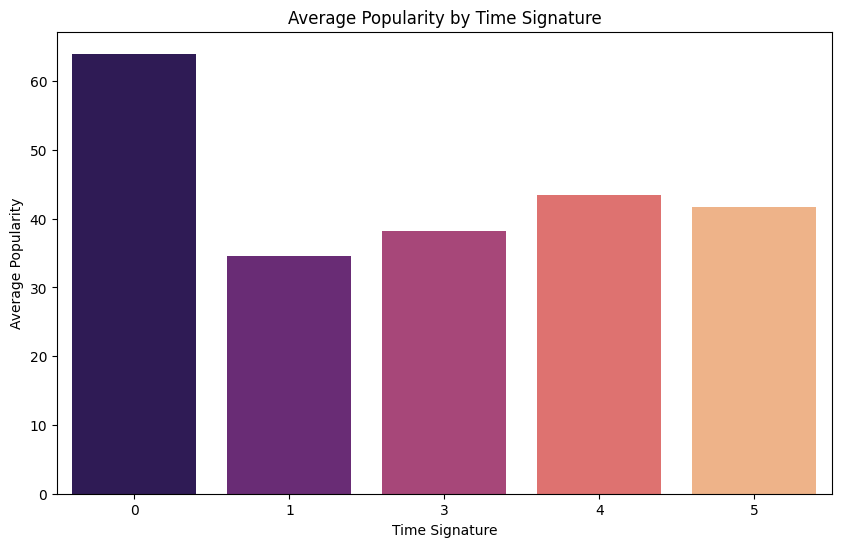

In [17]:
# Group by time signature and calculate the mean popularity
time_signature_popularity = df.groupby('Time_Signature')['Popularity'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Time_Signature', y='Popularity', data=time_signature_popularity, palette='magma')
plt.title('Average Popularity by Time Signature')
plt.xlabel('Time Signature')
plt.ylabel('Average Popularity')
plt.show()


#8. What is the distribution of tempo across different genres?

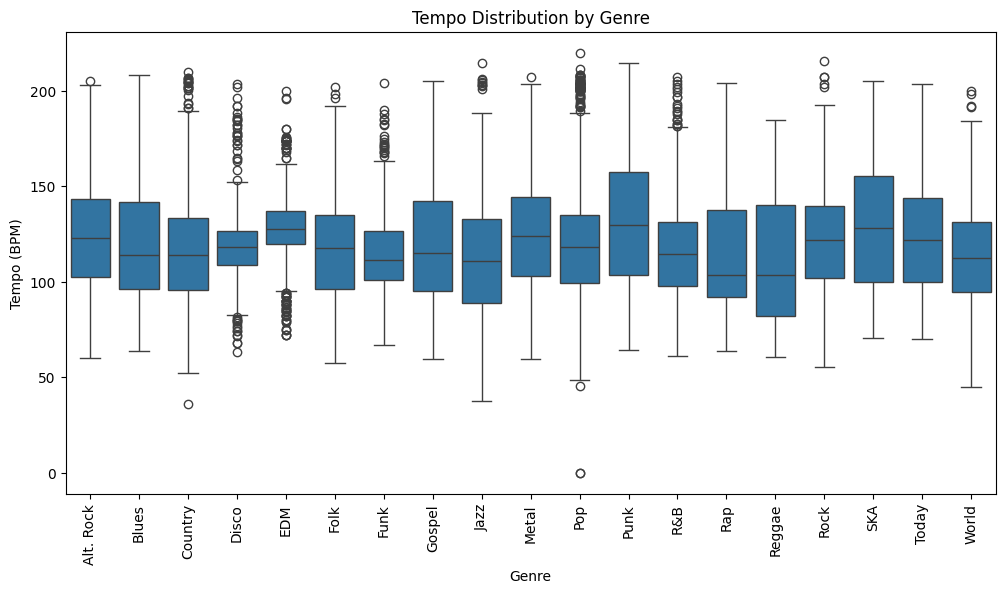

In [18]:
# Box plot for tempo by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Tempo', data=df)
plt.title('Tempo Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Tempo (BPM)')
plt.xticks(rotation=90)
plt.show()


#9. Are acoustic songs more or less popular than non-acoustic songs?

<ipython-input-19-c917d0c387a5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Is_Acoustic', y='Popularity', data=acoustic_popularity, palette='coolwarm')


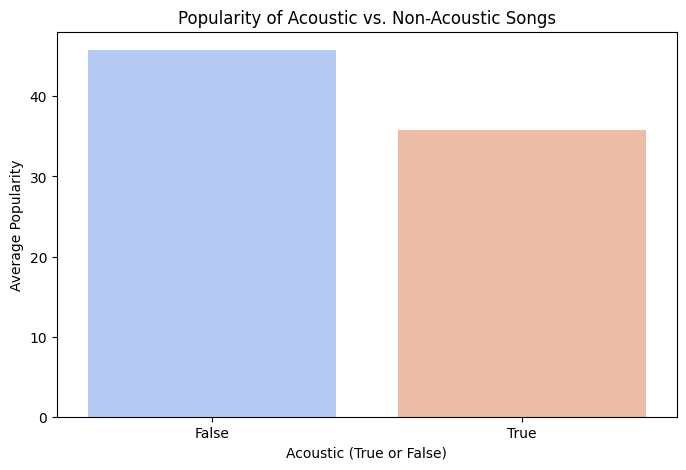

In [19]:
# Create a binary column for acoustic vs. non-acoustic
df['Is_Acoustic'] = df['Acousticness'] > 0.5

# Group by acousticness and calculate the mean popularity
acoustic_popularity = df.groupby('Is_Acoustic')['Popularity'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Is_Acoustic', y='Popularity', data=acoustic_popularity, palette='coolwarm')
plt.title('Popularity of Acoustic vs. Non-Acoustic Songs')
plt.xlabel('Acoustic (True or False)')
plt.ylabel('Average Popularity')
plt.show()


#10. How does the instrumentalness of a track relate to its popularity?

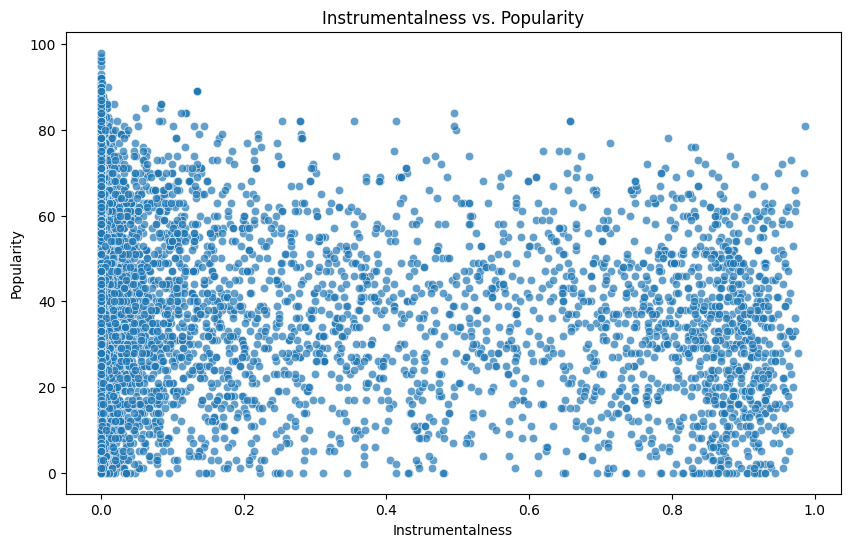

In [20]:
# Scatter plot for instrumentalness vs. popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Instrumentalness', y='Popularity', data=df, alpha=0.7)
plt.title('Instrumentalness vs. Popularity')
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')
plt.show()
